# Klasyfikacja zbioru MNIST


In [ ]:
from keras.datasets import mnist

from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import cv2

**Przygotowanie danych**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
y_test = test_labels

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Tworzenie sieci**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

*   Wraz z wgłębianiem się w sieć wysokość i szerokość zmniejszają się
*   Liczba kanałow: 32 lub 64
*   Musimy spłaszyć dane do sieci Dense



In [ ]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)
model.save('mnist_model.h5')

Epoch 1/5
938/938 [==============================] - 61s 64ms/step - loss: 0.1730 - accuracy: 0.9450
Epoch 2/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0451 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0184 - accuracy: 0.9945


**Sprawdzenie modelu**

In [ ]:
mnist_model = models.load_model('mnist_model.h5')
loss_and_metrics = mnist_model.evaluate(test_images, test_labels, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 6s - loss: 0.0287 - accuracy: 0.9918 - 6s/epoch - 19ms/step
Test Loss 0.02874757908284664
Test Accuracy 0.9918000102043152


In [ ]:
predict_x=mnist_model.predict(test_images)
classes_x=np.argmax(predict_x,axis=1)

correct_indices = np.nonzero(classes_x == y_test)[0]
incorrect_indices = np.nonzero(classes_x != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


313/313 [==============================] - 3s 10ms/step

9918  classified correctly
82  classified incorrectly


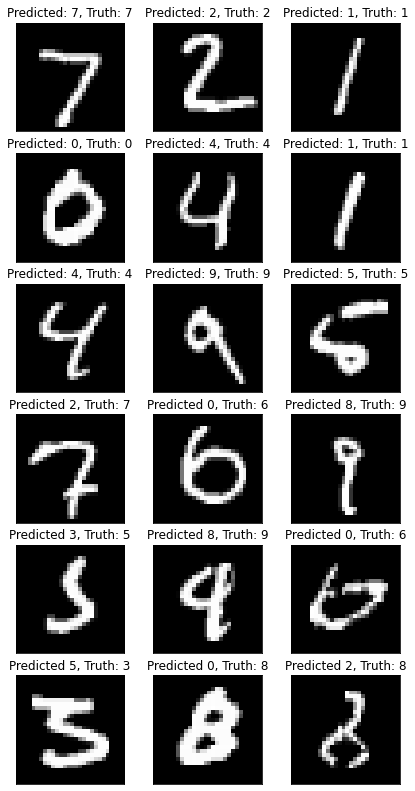

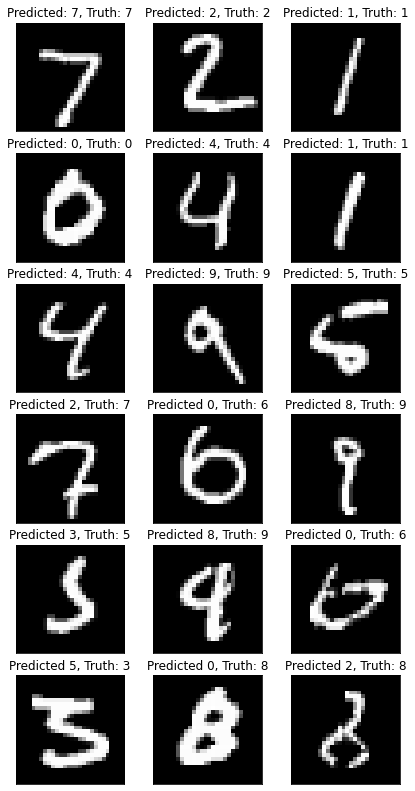

In [ ]:
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(test_images[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(classes_x[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(test_images[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(classes_x[incorrect],
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

**Testowanie modelu na własnych obrazach**

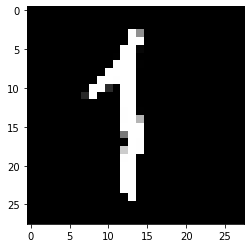

In [ ]:
file = 'one.jpg'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
test_image = cv2.resize(test_image, (28, 28), interpolation=cv2.INTER_LINEAR)
test_image = cv2.bitwise_not (test_image)

plt.imshow(test_image, cmap = 'gray')

In [ ]:
test_image = test_image.reshape((1, 28, 28, 1))
test_image = test_image.astype('float32') / 255

predict_img=mnist_model.predict(test_image)
classes_img=np.argmax(predict_img,axis=1)

print(classes_img)

1/1 [==============================] - 0s 48ms/step
[1]
